#### Programa de Formación en ML & DS
## Introducción al Aprendizaje Automático
# Sesión 6: Redes Neuronales (Taller)

Importamos algunas funciones para visualizar los datos y las superficies de decisión:

In [0]:
#Instalación del paquete tabulate para imprimir la matriz de confusión
!pip install tabulate

    100% |████████████████████████████████| 51kB 303kB/s ta 0:00:011
  Running setup.py bdist_wheel for tabulate ... done
  Stored in directory: /Users/campopinillos/Library/Caches/pip/wheels/2b/67/89/414471314a2d15de625d184d8be6d38a03ae1e983dbda91e84
Successfully built tabulate


In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as pl
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Función para visualizar un conjunto de datos en 2D
def plot_data(X, y, size=None):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k', s=size,
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
# Función para visualizar de la superficie de decisión de un clasificador
def plot_decision_region2(X, pred_fun):      #Función para visualizar la superficie de decisión de nuestro algoritmo.
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= 1, vmax=3)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

def list_cm(cm,classes):     #función para generar de una forma más visual la matriz de confusión
    if len(cm)==2:
      cm.astype(int)
      row_0 =['','Valor','Verdadero']
      row_1 =['-',classes[0],classes[1]]
      row_2 =[classes[0],cm[0,0],cm[1,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1]]
      table = zip(row_0,row_1, row_2, row_3)
      headers = ['', '', 'Valor', 'Predicho']  
      return print(tabulate(table, headers=headers, floatfmt=".0f"))
    else:
      cm.astype(int)
      row_0 =['','Valor','Verdadero','']
      row_1 =['-',np.int(classes[0]),classes[1],classes[2]]
      row_2 =[classes[0],cm[0,0],cm[1,0],cm[2,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1],cm[2,1]]
      row_4 =[classes[2],cm[0,2],cm[1,2],cm[2,2]]
      table = zip(row_0,row_1, row_2, row_3, row_4)
      headers = ['', '', 'Valor', 'Predicho', '']  
      return print(tabulate(table, headers=headers, floatfmt=".0f")) 

En el siguiente Taller vamos a construir un MLP para clasificar tipos de vinos. Para esto vamos a  descargarla base de datos llamada *Wine* disponible en [aquí](https://drive.google.com/open?id=0B8POkZpAJ5qQRlFzVUZnMlZVakk). Si requiere más información sobre la base datos, la puede encontrar en el siguiente link  [aquí](https://archive.ics.uci.edu/ml/datasets/wine).

El conjunto de datos contiene los ejemplos de 178 vinos. Cada uno identificado por 13 propiedades químicas:
* Alcohol
* Malic_acid
* Ash
* Alcalinity
* Magnesium
* Phenols
* Flavanoids
* Nonflavanoid
* Proanthocyanins
* Color
* Hue
* OD280/OD315
* Proline

A cada vino le fue asignada una clase, que corresponde al tipo de vino $[1, 2, 3]$

1. Cargue el conjunto de datos como un DataFrame de Pandas
2. Cargue la clase en un arreglo aparte. Eliminela del DataFrame de Pandas

**Clasificación usando solo dos características:**
3. Entrene un modelo MLP para categorizar el tipo de vino usando `Proline` contra `Flavonoids`.
4. Entrene otro modelo MLP para categorizar el tipo de vino usando `Alcalinity` contra `Malic Acid`.
5. Imprima la región de decisión de cada clasificador.
6. Genere la matriz de confusión de cada clasificador.
7. Reporte el accuracy, el error de clasificación, la precisión macro, el recall macro y el F1 score macro.
    * ¿Cual modelo se desempeña mejor? ¿Por qué?

**Clasificación usando todas las características:**
8.  Escale **todo** el conjunto de datos de tal forma que tenga media cero y varianza uno. Use el código que se proporcionó arriba. Genere una partición estratificada 70-30 sobre el conjunto de datos.
9. Entrene un modelo MLP usando todas las características.
10. Genere la matriz de confusión del clasificador para el conjunto de training y test.
11. Reporte el accuracy, el error de clasificación, la precisión por clase, el recall por clase y el F1 score por clase.
  * ¿Cual modelo se desempeña mejor? ¿Por qué? ¿Cual clase es más sencilla para el clasificador?
12. Entrene tres modelo MLP usando el conjunto **training** y evaluando en el conjunto **test** donde::
    * Se aumente el número de neuronas.
    * Se aumente el número de capas.
    * Se aumente el número de capas y neuronas.
      * ¿Cual modelo se desempeña mejor? ¿Por qué?

###1. Cargamos el conjunto de datos como un DataFrame de Pandas###

In [0]:
!pip install -U -q PyDrive

In [0]:
df = pd.read_csv('wine.data.txt')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


###2. Cargamos la clase en un arreglo aparte y la eliminamos del DataFrame de Pandas###

In [0]:
y = df["Class"].values
df_no_class = df.drop(columns="Class")
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##Clasificación usando solo dos características:

###3. Entrene un modelo MLP para categorizar el tipo de vino usando `Proline` contra `Flavonoids` (Escale los datos de tal forma que tengan media cero y desviación standard uno)

In [0]:
X_2 = df[[" Proline    ", " Flavanoids"]].values
print(X_2.shape)
X_2_c = (X_2-X_2.mean(axis = 0))/X_2.std(axis=0)

(178, 2)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=3, learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_2_c, y, test_size=0.3, stratify=y, random_state=12)

In [0]:
clf1 = MLPClassifier(solver='adam', alpha=1e-5, activation='logistic', max_iter=50000,
                    hidden_layer_sizes=(2), random_state=1)
clf1.fit(X_train_1, y_train_1)
clf1.score(X_train_1, y_train_1)
y_pred1 = clf1.predict(X_test_1)
clf1.score(X_train_1, y_train_1)

0.8790322580645161

###4. Entrenamos otro modelo MLP para categorizar el tipo de vino usando `Alcalinity` contra `Malic Acid` (Escale los datos de tal forma que tengan media cero y desviación standard uno).###

In [0]:
X_3 = df[[" Alcalinity", ' Malic_acid']].values
print(X_3.shape)
X_3_c = (X_3-X_3.mean(axis = 0))/X_3.std(axis=0)

(178, 2)


In [0]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_3_c, y, test_size=0.3, stratify=y, random_state=12)

In [0]:
clf2 = MLPClassifier(solver='adam', alpha=1e-5, activation='logistic', max_iter=50000,
                    hidden_layer_sizes=(3), random_state=1)
clf2.fit(X_train_2, y_train_2)
clf2.score(X_train_2, y_train_2)
y_pred2 = clf2.predict(X_test_2)
clf2.score(X_train_2, y_train_2)

0.7096774193548387

###5. Imprimimos la región de decisión de cada clasificador.###

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


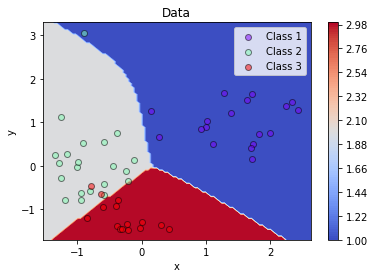

In [0]:
plot_decision_region2(X_test_1, gen_pred_fun(clf1))
plot_data(X_test_1, y_test_1)

In [0]:
!pip install mlxtend

    100% |████████████████████████████████| 1.3MB 103kB/s a 0:00:014


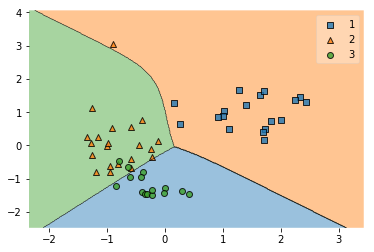

In [0]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test_1, y_test_1,clf=clf1)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


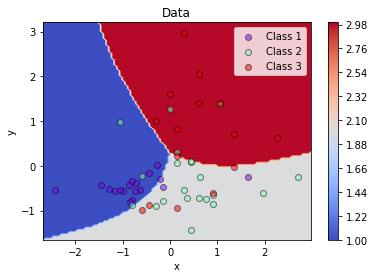

In [0]:
plot_decision_region2(X_test_2, gen_pred_fun(clf2))
plot_data(X_test_2, y_test_2)

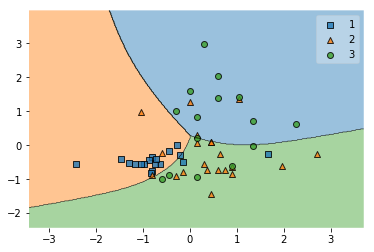

In [0]:
plot_decision_regions(X_test_2, y_test_2,clf=clf2)
plt.show()

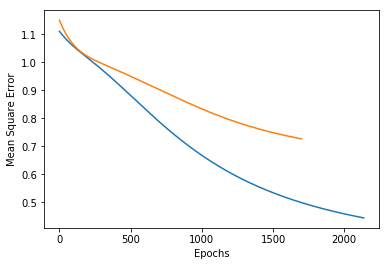

In [0]:
plt.ylabel('Mean Square Error')
plt.xlabel('Epochs')
plt.plot(clf1.loss_curve_)
plt.plot(clf2.loss_curve_)

In [0]:
print(classification_report(y_test_1, y_pred1))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       0.91      0.95      0.93        21
           3       1.00      0.87      0.93        15

   micro avg       0.94      0.94      0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54



In [0]:
print(classification_report(y_test_2, y_pred2))

              precision    recall  f1-score   support

           1       0.84      0.89      0.86        18
           2       0.68      0.71      0.70        21
           3       0.77      0.67      0.71        15

   micro avg       0.76      0.76      0.76        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.76      0.76      0.76        54



###6. Generamos la matriz de confusión de cada clasificador.###

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
print(confusion_matrix(y_test_1, y_pred1))

[[18  0  0]
 [ 1 20  0]
 [ 0  2 13]]


In [0]:
print(confusion_matrix(y_test_2, y_pred2))

[[16  2  0]
 [ 3 15  3]
 [ 0  5 10]]


##Clasificación usando todas las características:

###8.  Escale **todo** el conjunto de datos de tal forma que tenga media cero y varianza uno. Use el código que se proporcionó arriba. Genere una partición estratificada 70-30 sobre el conjunto de datos.

In [0]:
df_no_class_scale = (df_no_class-df_no_class.mean(axis = 0))/df_no_class.std(axis=0)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_no_class_scale, y, test_size=0.3, stratify=y, random_state=12)

###9. Entrene un modelo MLP usando todas las características.

In [0]:
clf = MLPClassifier(solver='adam', alpha=1e-5, activation='logistic', max_iter=50000,
                    hidden_layer_sizes=(3), random_state=1)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_train, y_train)

1.0

###10. Genere la matriz de confusión del clasificador para el conjunto de training y test.

In [0]:
from sklearn import metrics
print(confusion_matrix(y_test, y_pred))

[[18  0  0]
 [ 1 20  0]
 [ 0  1 14]]


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       0.95      0.95      0.95        21
           3       1.00      0.93      0.97        15

   micro avg       0.96      0.96      0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



### 11. Reporte el accuracy, el error de clasificación, la precisión por clase, el recall por clase y el F1 score por clase.
      * ¿Cual modelo se desempeña mejor? ¿Por qué? ¿Cual clase es más sencilla para el clasificador?

El modelo que se desempeña mejor es el que usa todas las variables para clasificar las categorias, al imprimir las respectivas matrices de confunsión se observa que el modelo que comete menos errores de clasificación es este último, teniendo un error de clasificación en la clase 2 y 3.

La clase más sencilla para el clasificador es la primera clase ya que se observa que en los tres modelos es con la cual se cometen menos errores de clasificación en el primer modelo se clasifican los 18 de la clase, el segundo solo se comeren 2 errores y en el último no se cometen errores clasificando los 18 vinos de esa clase.

12. Entrene tres modelos de MLP usando el conjunto **training** y evaluando en el conjunto **test** donde:
    * Se aumente el número de neuronas.
    * Se aumente el número de capas.
    * Se aumente el número de capas y neuronas.
      * ¿Cual modelo se desempeña mejor? ¿Por qué?

In [0]:
clf_A = MLPClassifier(solver='adam', alpha=1e-5, activation='logistic', max_iter=50000,
                    hidden_layer_sizes=(5), random_state=1)
clf_A.fit(X_train, y_train)
clf_A.score(X_train, y_train)
y_pred_A = clf_A.predict(X_test)
print(clf_A.score(X_train, y_train))
print(confusion_matrix(y_test, y_pred))

1.0
[[18  0  0]
 [ 0 21  0]
 [ 0  1 14]]


In [0]:
clf_B = MLPClassifier(solver='adam', alpha=1e-5, activation='logistic', max_iter=50000,
                    hidden_layer_sizes=(3,1,1), random_state=1)
clf_B.fit(X_train, y_train)
clf_B.score(X_train, y_train)
y_pred_B = clf_B.predict(X_test)
print(clf_B.score(X_train, y_train))
print(confusion_matrix(y_test, y_pred))

0.6693548387096774
[[18  0  0]
 [ 0 21  0]
 [ 0  1 14]]


In [0]:
clf_C = MLPClassifier(solver='adam', alpha=1e-5, activation='logistic', max_iter=50000,
                    hidden_layer_sizes=(4,4,4), random_state=1)
clf_C.fit(X_train, y_train)
clf_C.score(X_train, y_train)
y_pred_C = clf_C.predict(X_test)
print(clf_C.score(X_train, y_train))
print(confusion_matrix(y_test, y_pred))

0.4032258064516129
[[18  0  0]
 [ 0 21  0]
 [ 0  1 14]]


1) Al aumentar el número de neuronas se redujeron los errores de clasificación sin perder el accuracy del modelo. /// 

2) Cuando se aumenta el número de capas dejando solo una neurona en las dos capas siguientes se reduce el accuracy del modelo pero los errores de clasifiación no aumentan.
3) Al aumentar capas y neuronas tenemos un accuracy mucho más bajo aunque no se aumentan los errores de clasificación.